<a href="https://colab.research.google.com/github/yashodharatomar/credit_card_fraud_detection/blob/main/IsolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

file_link = "/content/drive/MyDrive/creditcard.csv"
input_data = pd.read_csv(file_link, sep=",")
print(input_data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [46]:
y = input_data['Class']
X = input_data.drop('Class', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)


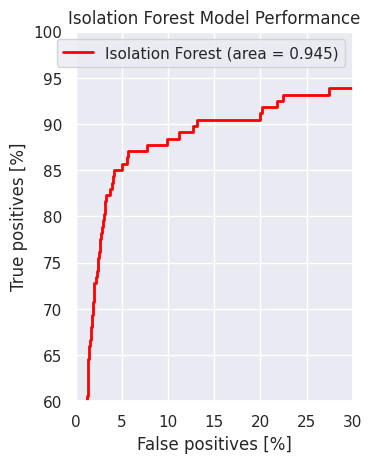

In [47]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

#create iforest model
iforest = IsolationForest()
#fit to data
iforest.fit(X_train)
#generate class probabilities
y_pred_iforest = - iforest.decision_function(X_val)

# print(y_pred_iforest)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred_iforest)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(100*fpr_rf, 100*tpr_rf, label= 'Isolation Forest (area = {:.3f})'.format(auc_rf), linewidth=2, color = 'red')
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.xlim([0,30])
plt.ylim([60,100])
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal')
plt.title('Isolation Forest Model Performance')
plt.legend(loc='best')
plt.show()